In [17]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time module.
import time


from scipy.stats import linregress


Beginning Data Retrieval     
-----------------------------


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high =90.000, size =1500)
lngs =np.random.uniform(low=-180.000, high =180.000, size =1500)
lat_lngs = zip(lats,lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
        # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)
    

600

In [5]:
# Starting URL for Weather Map API Call.
# url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# print(url)

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | ketchikan
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | chitose
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | saskylakh
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | warqla
City not found. Skipping...
Processing Record 14 of Set 1 | bathsheba
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | huarmey
Processing Record 17 of Set 1 | nisia floresta
Processing Record 18 of Set 1 | turayf
Processing Record 19 of Set 1 | pilar
Processing Record 20 of Set 1 | coahuayana
Processing Record 21 of Set 1 | blu

Processing Record 36 of Set 4 | villacarrillo
Processing Record 37 of Set 4 | kommunisticheskiy
Processing Record 38 of Set 4 | luderitz
Processing Record 39 of Set 4 | qaanaaq
Processing Record 40 of Set 4 | ostrovnoy
Processing Record 41 of Set 4 | dikson
Processing Record 42 of Set 4 | umm kaddadah
Processing Record 43 of Set 4 | hualmay
Processing Record 44 of Set 4 | biak
Processing Record 45 of Set 4 | amahai
Processing Record 46 of Set 4 | nanortalik
Processing Record 47 of Set 4 | salalah
Processing Record 48 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 4 | brigantine
Processing Record 50 of Set 4 | tuatapere
Processing Record 1 of Set 5 | zambezi
Processing Record 2 of Set 5 | tripoli
Processing Record 3 of Set 5 | xinmin
Processing Record 4 of Set 5 | saint-augustin
Processing Record 5 of Set 5 | vilyuysk
Processing Record 6 of Set 5 | bengkulu
Processing Record 7 of Set 5 | narsaq
Processing Record 8 of Set 5 | namatanai
Processing Reco

Processing Record 28 of Set 8 | mehamn
Processing Record 29 of Set 8 | kovdor
Processing Record 30 of Set 8 | yarmouth
Processing Record 31 of Set 8 | vanavara
Processing Record 32 of Set 8 | kawalu
Processing Record 33 of Set 8 | energeticheskiy
Processing Record 34 of Set 8 | tautira
Processing Record 35 of Set 8 | formoso do araguaia
City not found. Skipping...
Processing Record 36 of Set 8 | samusu
City not found. Skipping...
Processing Record 37 of Set 8 | awbari
Processing Record 38 of Set 8 | balclutha
Processing Record 39 of Set 8 | sterling
Processing Record 40 of Set 8 | rawson
Processing Record 41 of Set 8 | verkhoyansk
Processing Record 42 of Set 8 | necochea
Processing Record 43 of Set 8 | altay
Processing Record 44 of Set 8 | waddan
Processing Record 45 of Set 8 | okhotsk
Processing Record 46 of Set 8 | dalbandin
Processing Record 47 of Set 8 | tasiilaq
Processing Record 48 of Set 8 | selfoss
Processing Record 49 of Set 8 | urengoy
Processing Record 50 of Set 8 | kieta
Pr

Processing Record 19 of Set 12 | kilindoni
Processing Record 20 of Set 12 | setermoen
Processing Record 21 of Set 12 | padang
Processing Record 22 of Set 12 | baghdad
Processing Record 23 of Set 12 | kuche
City not found. Skipping...
Processing Record 24 of Set 12 | praia da vitoria
Processing Record 25 of Set 12 | kawambwa
Processing Record 26 of Set 12 | gao
Processing Record 27 of Set 12 | terney
Processing Record 28 of Set 12 | zenzeli
Processing Record 29 of Set 12 | pacanga
Processing Record 30 of Set 12 | provideniya
Processing Record 31 of Set 12 | riachao
Processing Record 32 of Set 12 | malakal
Processing Record 33 of Set 12 | alekseyevka
Processing Record 34 of Set 12 | suhbaatar
Processing Record 35 of Set 12 | sinfra
Processing Record 36 of Set 12 | kismayo
Processing Record 37 of Set 12 | aloleng
Processing Record 38 of Set 12 | cauquenes
Processing Record 39 of Set 12 | manta
Processing Record 40 of Set 12 | gladstone
Processing Record 41 of Set 12 | udachnyy
Processing 

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,69.37,67,0,6.85,US,2022-07-26 03:06:32
1,Ketchikan,55.3422,-131.6461,66.67,72,20,10.36,US,2022-07-26 03:06:52
2,Busselton,-33.6500,115.3333,61.52,80,100,17.81,AU,2022-07-26 03:08:00
3,Bambous Virieux,-20.3428,57.7575,67.21,94,75,3.44,MU,2022-07-26 03:08:01
4,Cape Town,-33.9258,18.4232,59.11,60,4,3.85,ZA,2022-07-26 03:08:01
...,...,...,...,...,...,...,...,...,...
556,Bilibino,68.0546,166.4372,55.22,40,91,11.30,RU,2022-07-26 03:22:20
557,Sioux Lookout,50.1001,-91.9170,64.47,68,75,6.91,CA,2022-07-26 03:22:20
558,Leh,34.1667,77.5833,65.12,53,92,2.73,IN,2022-07-26 03:22:21
559,Rocha,-34.4833,-54.3333,59.47,97,100,10.20,UY,2022-07-26 03:22:21


In [8]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_sorted_df = city_data_df[new_column_order]
city_data_sorted_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Albany,US,2022-07-26 03:06:32,42.6001,-73.9662,69.37,67,0,6.85
1,Ketchikan,US,2022-07-26 03:06:52,55.3422,-131.6461,66.67,72,20,10.36
2,Busselton,AU,2022-07-26 03:08:00,-33.6500,115.3333,61.52,80,100,17.81
3,Bambous Virieux,MU,2022-07-26 03:08:01,-20.3428,57.7575,67.21,94,75,3.44
4,Cape Town,ZA,2022-07-26 03:08:01,-33.9258,18.4232,59.11,60,4,3.85
...,...,...,...,...,...,...,...,...,...
556,Bilibino,RU,2022-07-26 03:22:20,68.0546,166.4372,55.22,40,91,11.30
557,Sioux Lookout,CA,2022-07-26 03:22:20,50.1001,-91.9170,64.47,68,75,6.91
558,Leh,IN,2022-07-26 03:22:21,34.1667,77.5833,65.12,53,92,2.73
559,Rocha,UY,2022-07-26 03:22:21,-34.4833,-54.3333,59.47,97,100,10.20


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]
max_temps= city_data_df["Max Temp"]
humidity= city_data_df["Humidity"]
cloudiness= city_data_df["Cloudiness"]
wind_speed= city_data_df["Wind Speed"]

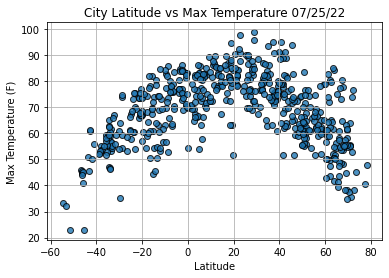

In [13]:
# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats, max_temps, edgecolor ="black", linewidth = 1, marker = "o",
           alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.

plt.title(f"City Latitude vs Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)



# Save the figure.

plt.savefig("weather_data/Fig1.png")


# Show plot.
plt.show()



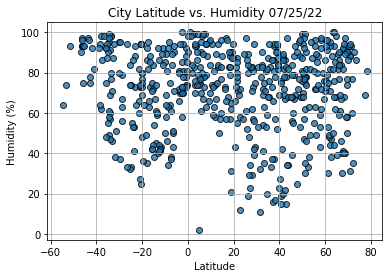

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

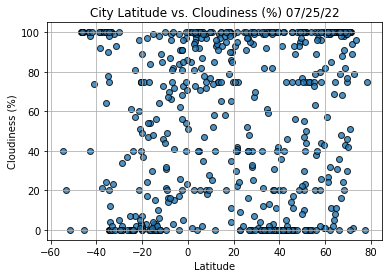

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

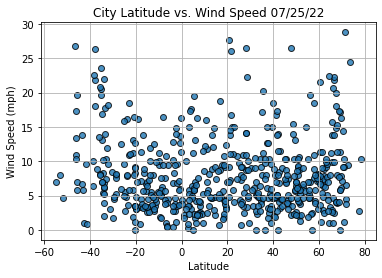

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

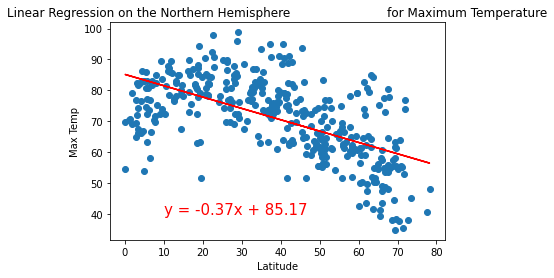

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

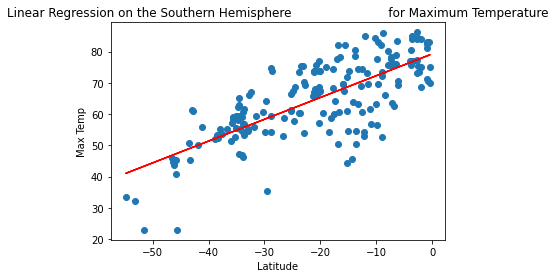

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

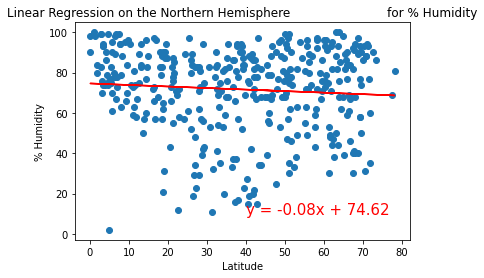

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

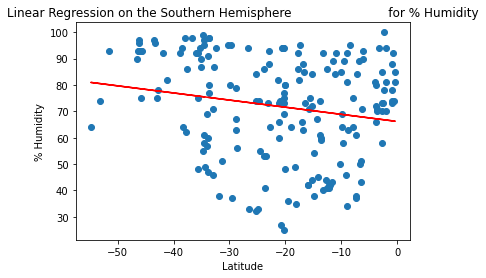

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

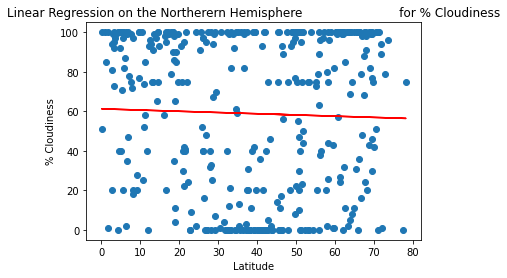

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northerern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

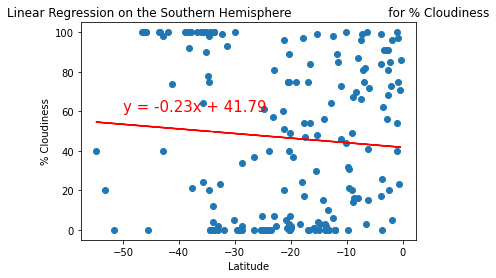

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

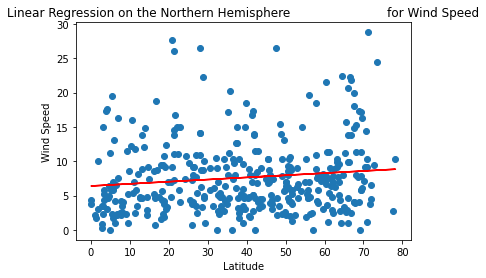

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

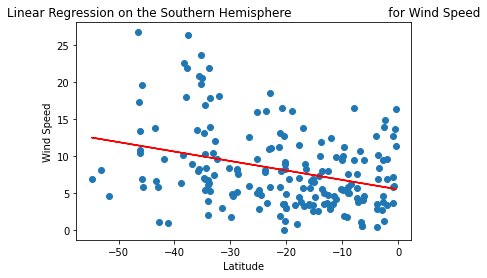

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))